In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
import configparser
from google.colab import drive
drive.mount('/content/gdrive')
path = '/content/gdrive/My Drive/Visualization/Data/'
path_img = '/content/gdrive/My Drive/Visualization/Images/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Population Pyramid

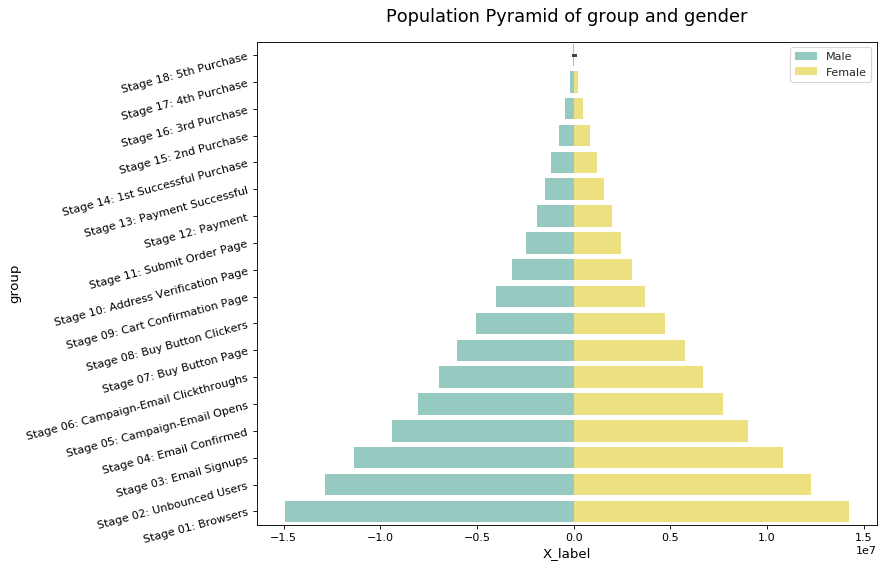

In [0]:
# loading and preparing data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# groups setting 
group_col = 'Gender'

# bar orders setting 
order_of_bars = df.Stage.unique()[::-1]

# color labels setting
colors = [plt.cm.Set3(i/float(len(df[group_col].unique())-1)) for i in range(len(df[group_col].unique()))]

# plot size setting
fig, ax = plt.subplots(figsize = (10,8), dpi=80)

# drawing Plot
for c, group in zip(colors, df[group_col].unique()):
    g = sns.barplot(x='Users',y='Stage',data=df.loc[df[group_col]==group, :],order=order_of_bars,color=c,label=group)

# background setting 
sns.set(style='white')

# title and size
ax.set_title('Population Pyramid of group and gender',fontsize=16,pad = 18)

# x,y labels and size
plt.xlabel("X_label",fontsize=12)
plt.ylabel("group",fontsize=12)

# tick labels and size, rotation
plt.xticks(fontsize=10)
plt.yticks(fontsize=10, rotation=15)

# legend and size
plt.legend(frameon=True, fontsize=10)

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'pyramid_group.pdf', bbox_inches='tight')
# showing the image
plt.show()

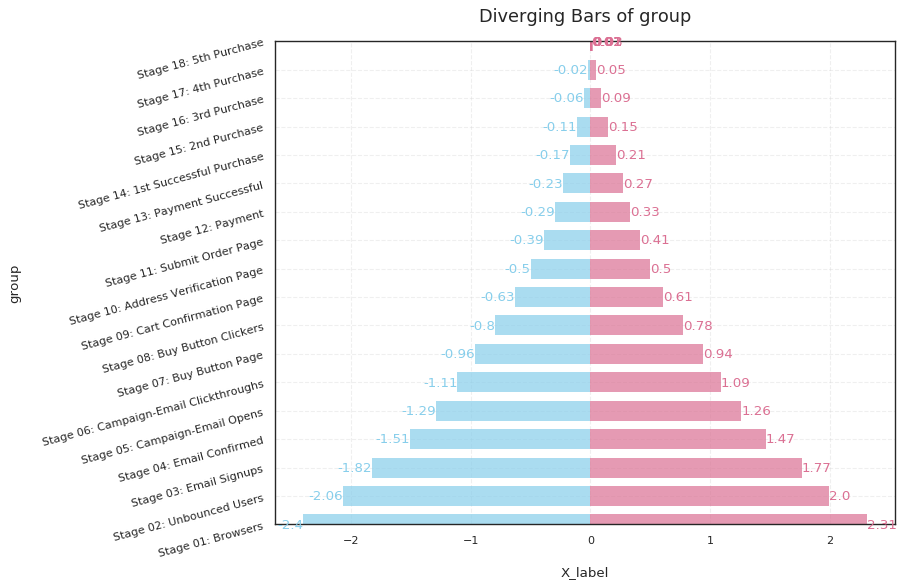

In [0]:
# loading and preparing data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/email_campaign_funnel.csv")

# fix x tick setting 
x = df.loc[:, ['Users']]
df['Users'] = (x - x.mean())/x.std()

# bar orders setting 
df.sort_values('Users', inplace=True)
df.reset_index(inplace=True)

# color labels setting 
color = ['skyblue','palevioletred']
df['colors'] = [color[0] if x < 0 else color[1] for x in df['Users']]

# plot size setting
fig, ax = plt.subplots(figsize = (10,8), dpi=80)

# drawing plot
# border setting to solid, bar width setting
plt.hlines(y=df.Stage, xmin=0, xmax=df.Users, linestyles='solid', alpha=.7, color=df.colors, linewidth=18)

# marking values on each bar
for x, y, text in zip(df.Users, df.Stage, df.Users):
    plt.text(x, y, round(text, 2), horizontalalignment='right' if x < 0 else 'left',
             verticalalignment='center', fontdict={'color': color[0] if x < 0 else color[1], 'size':12})

# background setting to "light grid"
plt.grid(linestyle= '--', alpha=.3)

# title and size
ax.set_title('Diverging Bars of group',fontsize=16,pad = 18)

# x,y label and size
plt.xlabel("X_label", fontsize=12, labelpad=18)
plt.ylabel("group",fontsize=12, labelpad=18)

# tick labels setting, content, text size, and rotation angle
plt.xticks(fontsize=10)
plt.yticks(df.index, fontsize=10, rotation=15)
plt.ylim('Stage 01: Browsers','Stage 18: 5th Purchase')

# save plot as pdf file
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure 
plt.savefig(path_img+'pyramid_groupvalue.pdf', bbox_inches='tight')
# showing the image
plt.show()

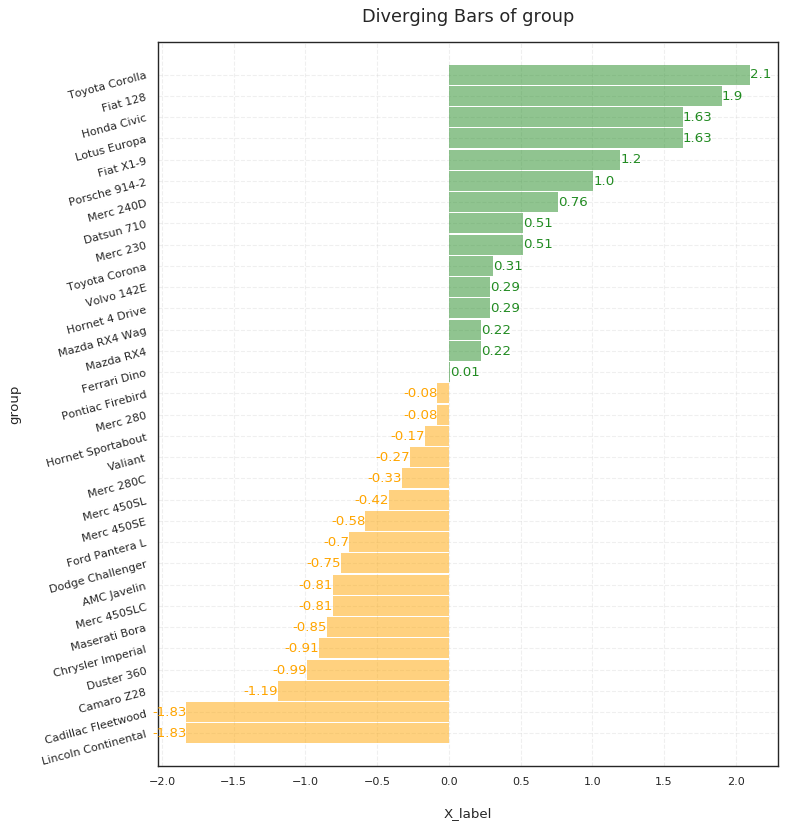

In [0]:
# loading Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mtcars.csv")

# fix x ticks setting 
x = df.loc[:, ['mpg']]
df['mpg_z'] = (x - x.mean())/x.std()

# bar orders setting 
df.sort_values('mpg_z', inplace=True)
df.reset_index(inplace=True)

# color labels setting 
color = ['orange', 'forestgreen']
df['colors'] = [color[0] if x < 0 else color[1] for x in df['mpg_z']]

# plot size setting
fig, ax = plt.subplots(figsize = (10,12), dpi=80)

# drawing plot, and set border to solid, bar width
plt.hlines(y=df.index, xmin=0, xmax=df.mpg_z, linestyles='solid', alpha=.5, color=df.colors, linewidth=18)

# marking values on each bar
for x, y, text in zip(df.mpg_z, df.index, df.mpg_z):
    plt.text(x, y, round(text, 2), horizontalalignment='right' if x < 0 else 'left',
             verticalalignment='center', fontdict={'color': color[0] if x < 0 else color[1], 'size':12})

# background setting to light grid
plt.grid(linestyle= '--', alpha=.3)

# title and size
ax.set_title('Diverging Bars of group',fontsize=16,pad = 18)

# x,y labels and size
plt.xlabel("X_label", fontsize=12, labelpad=18)
plt.ylabel("group",fontsize=12, labelpad=18)

# tick labels setting, content, text size, and rotation angle
plt.xticks(fontsize=10)
plt.yticks(df.index, df.cars, fontsize=10, rotation=15)

# save image as pdf to path folder
# bbox in inches, only the given portion of the figure is saved, figure out the tight bbox of the figure
plt.savefig(path_img+'pyramid_group2.pdf', bbox_inches='tight')
# showing the image
plt.show()